In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.ticker as ntick

In [2]:
churn = pd.read_csv('churn.txt')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.shape

(7043, 21)

In [5]:
churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#### Observations - total charges is object but it should be integer type

In [8]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Finding the count of churners in the data and Percentage also
churn['Churn'].value_counts()
100*churn['Churn'].value_counts()/len(churn['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Count of churn per category')

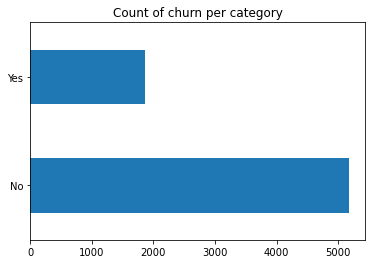

In [10]:
# Using bar plot seeing the churner values
churn['Churn'].value_counts().plot(kind= 'barh')
plt.title("Count of churn per category")

In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


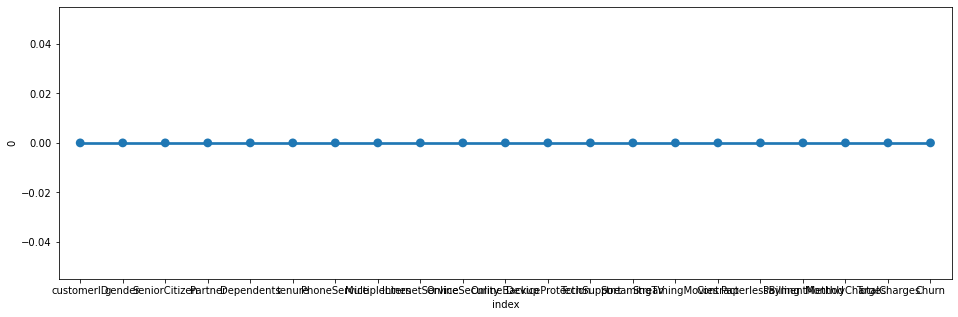

In [12]:
#finding the percentage of missing values
missing= pd.DataFrame((churn.isnull().sum())*100/churn.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.show()

                      

In [13]:
#creating a copy of data base
data = churn.copy()

In [14]:
#changing total charges from object type to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
### now here we can see total charges have 11 null values

In [16]:
#checking the total charges data
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
#removing missing values from the data
data.dropna(how='any', inplace = True)

In [18]:
#getting max value of the tenure
print(data['tenure'].max())

72


In [19]:
#72 months is our max tenure month from the data we have got.
#Now, according to this we will convert it into binz for the visualization.

In [20]:
#grouping the tensure in the bins of 12 months
labels = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
data['tenure_group']=pd.cut(data.tenure,range(1,80,12),right=False,labels=labels)

In [21]:
data['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [22]:
#dropping the column which are not required
data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

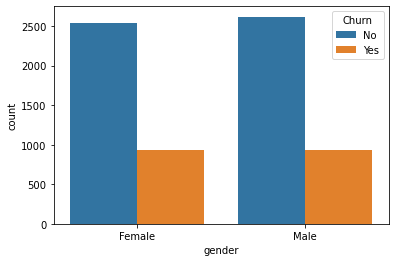

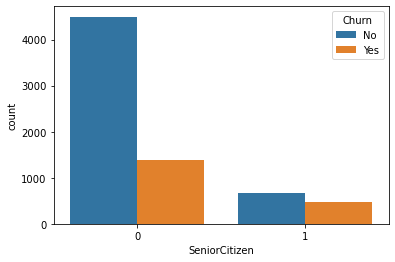

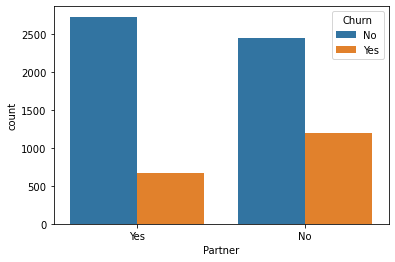

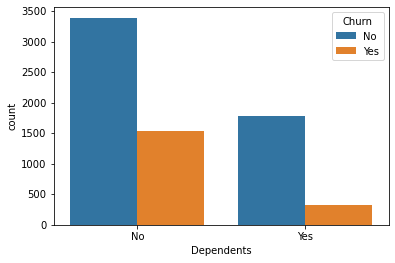

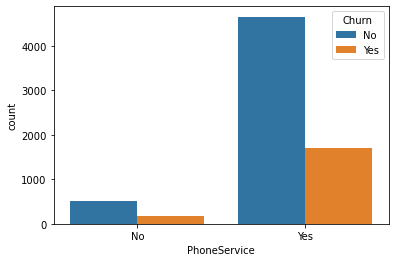

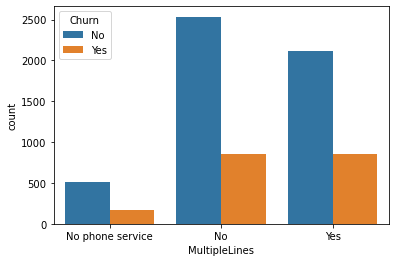

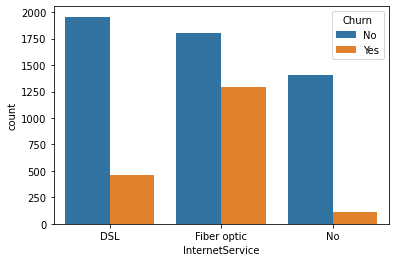

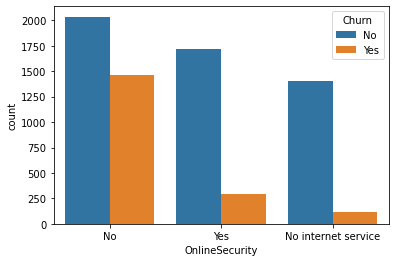

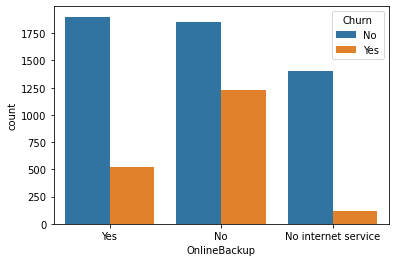

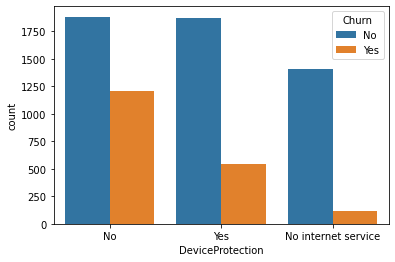

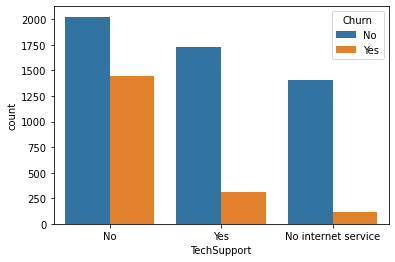

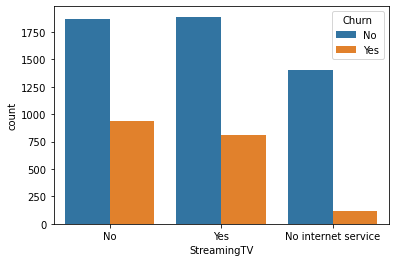

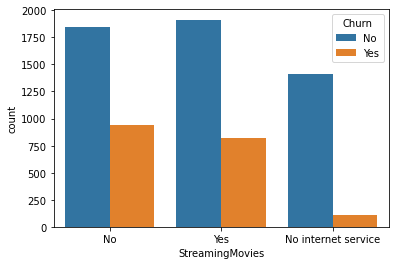

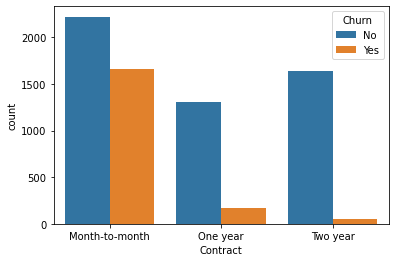

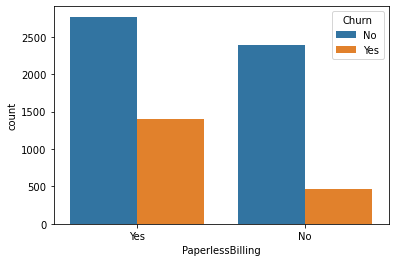

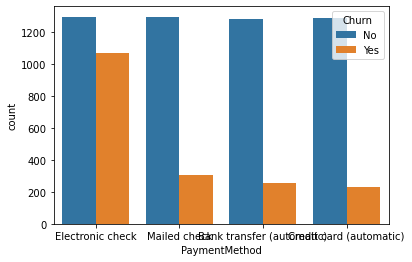

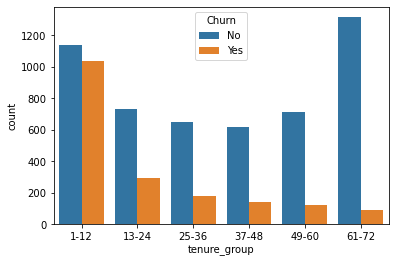

In [23]:
#Univariate Analysis
for i, predictor in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data,x=predictor,hue='Churn')

In [24]:
#converting target variable churn from Yes or No to 0 or 1
data['Churn']=np.where(data.Churn == 'Yes',1,0)

In [25]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [26]:
#converting all categorical values into dummies variable.
data_dummies=pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


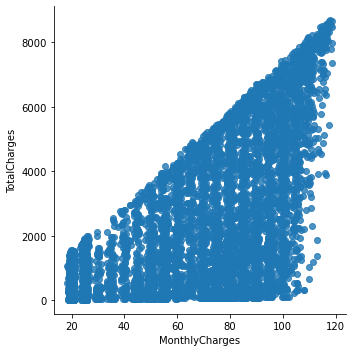

In [27]:
#Relationship between Monthly charges and Total charges
sns.lmplot(data=data_dummies, x='MonthlyCharges', y='TotalCharges',fit_reg= False)

Text(0.5, 1.0, 'Monthly charges by churn')

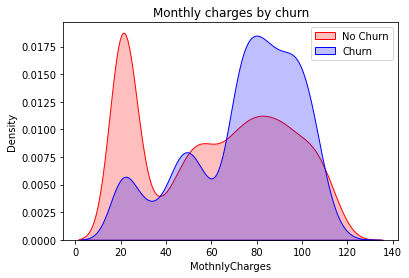

In [28]:
#Churn and Monthly charges 
mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"]==0)],color="Red",shade=True)
mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"]==1)],ax=mth,color="Blue",shade=True)
mth.legend(["No Churn","Churn"],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('MothnlyCharges')
mth.set_title('Monthly charges by churn')

In [29]:
#Insight from the above graph is when monthly charges is high churns are also higher.

Text(0.5, 1.0, 'Total charges by churn')

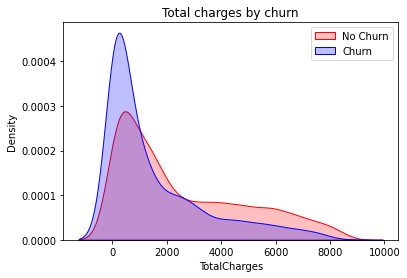

In [30]:
#Churn and Total charges 
mth=sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"]==0)],color="Red",shade=True)
mth=sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"]==1)],ax=mth,color="Blue",shade=True)
mth.legend(["No Churn","Churn"],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('TotalCharges')
mth.set_title('Total charges by churn')

In [31]:
# Insights- Higher churn at lower total charges
#After combining the 3 parameters tenure,monthly charges , total charges...Higher monthly charge into lower tenure result to lower total charges.

<AxesSubplot:>

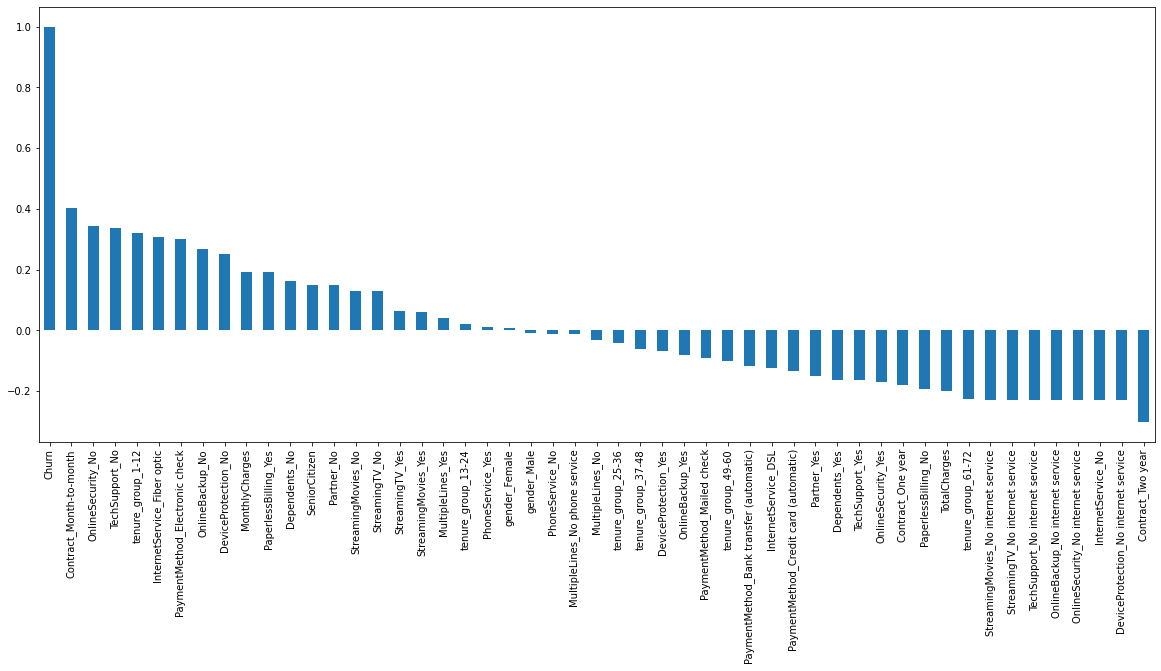

In [32]:
#build a corelation with all the predictors with churn
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending= False).plot(kind='bar')

In [33]:
#Insights- High churn in case of month to month contracts,no online security,no tech support,first year subscription and fibre optics Internet.
#Low churn is seen in case of long term contracts ,Subscriptions without internet service, and the customers engaged for 5+ yrs.
#Factors like Gender,Availability of phone service  have almost no impact on churn.

<AxesSubplot:>

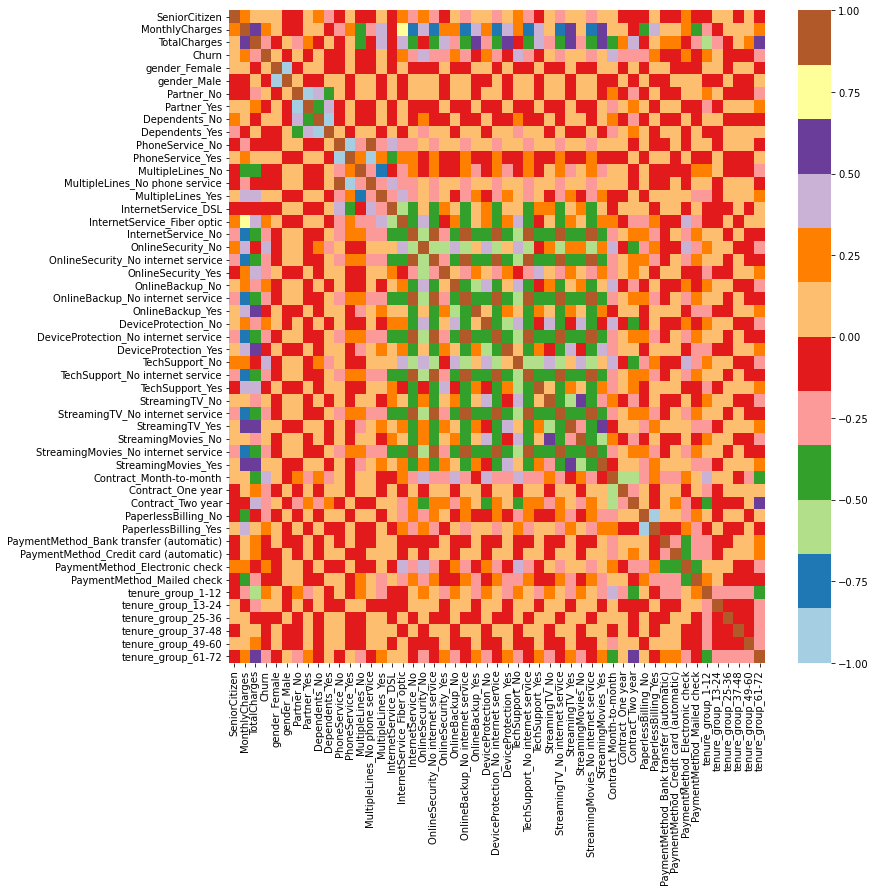

In [34]:
#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(),cmap="Paired")

# Bivariate Analysis

In [35]:
#creating two different data frames for churned and not churned
target0 = data.loc[data["Churn"]==0]
target1 = data.loc[data["Churn"]==1]

In [36]:
def uniplot(df,col,title,hue= None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]=28
    plt.rcParams["axes.titlesize"]=22
    plt.rcParams["axes.titlepad"]=30
    
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    
    plt.show()

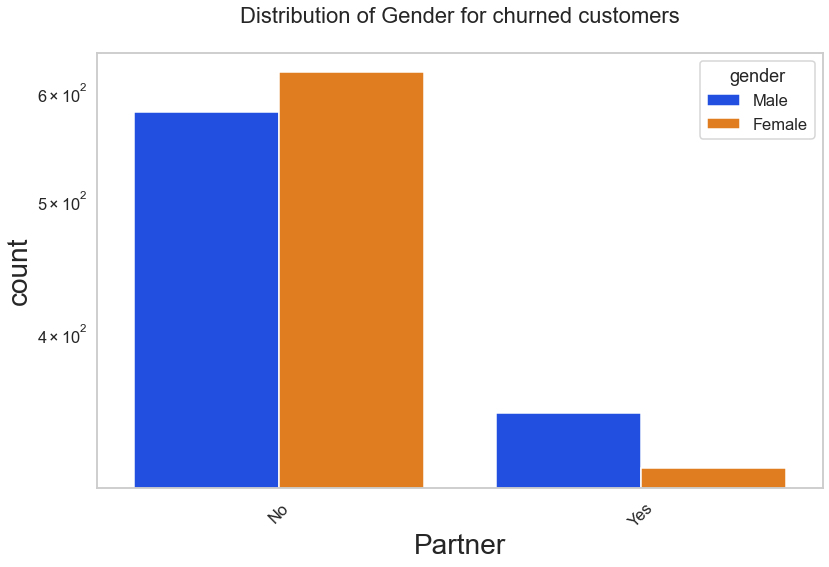

In [37]:
uniplot(target1,col='Partner',title='Distribution of Gender for churned customers',hue='gender')

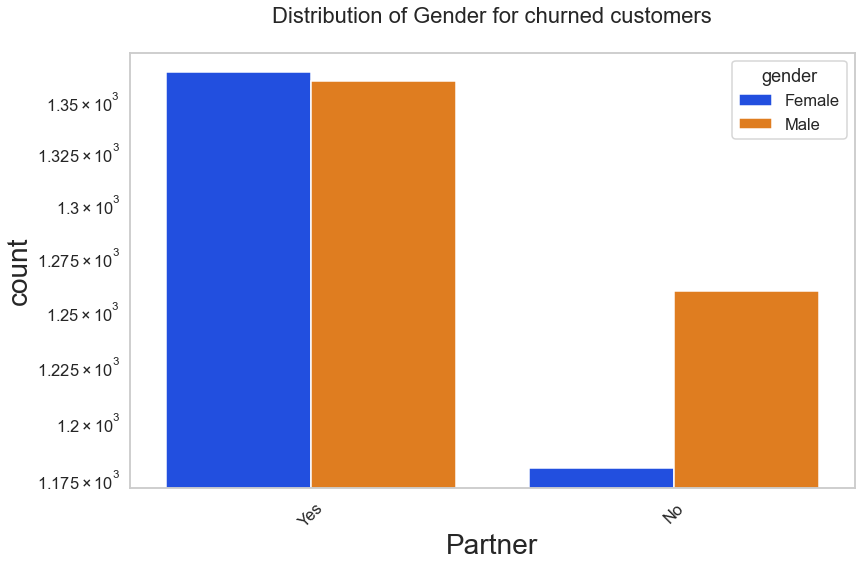

In [38]:
uniplot(target0,col='Partner',title='Distribution of Gender for churned customers',hue='gender')

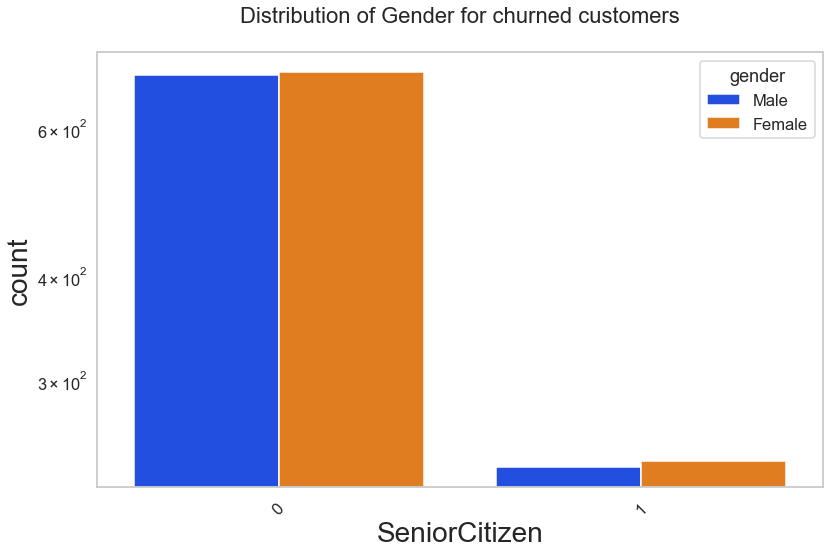

In [39]:
uniplot(target1,col='SeniorCitizen',title='Distribution of Gender for churned customers',hue='gender')

In [40]:
data_dummies.to_csv('tel_churn.csv')

# Model Building

In [41]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [42]:
df =pd.read_csv('tel_churn.csv')

In [43]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [46]:
df = df.drop('Unnamed: 0',axis=1)

In [47]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [50]:
#Creating X and Y varaible
x= df.drop('Churn',axis=1)
y=df['Churn']

In [58]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

#### Decision tree Classifier

In [55]:
model_dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [59]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [62]:
y_pred=model_dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred,labels=[0,1]))
#here we can see the precision ,recall,f1 score are very low becz we have imbalance data set

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1012
           1       0.61      0.53      0.57       395

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [67]:
print(confusion_matrix(y_test,y_pred))

[[879 133]
 [186 209]]


In [68]:
sm=SMOTEENN()
x_resampled,y_resampled=sm.fit_sample(x,y)

In [69]:
#again I will run the above model to check the score after resambling using smoteenn
xr_train,xr_test,yr_train,yr_test= train_test_split(x_resampled,y_resampled,test_size=0.2)

In [70]:
model_dt_smote=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [71]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [72]:
yr_pred=model_dt_smote.predict(xr_test)
yr_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [73]:
print(classification_report(yr_test,yr_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       524
           1       0.96      0.94      0.95       648

    accuracy                           0.95      1172
   macro avg       0.94      0.95      0.94      1172
weighted avg       0.95      0.95      0.95      1172



In [74]:
print(confusion_matrix(yr_test,yr_pred))

[[497  27]
 [ 37 611]]


#### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
print(classification_report(y_test,y_pred_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1012
           1       0.68      0.42      0.52       395

    accuracy                           0.78      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.77      0.78      0.76      1407



In [82]:
sm=SMOTEENN()
x_resampled,y_resampled=sm.fit_sample(x,y)

#again I will run the above model to check the score after resambling using smoteenn
xr_train,xr_test,yr_train,yr_test= train_test_split(x_resampled,y_resampled,test_size=0.2)

model_smote_rf=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

model_smote_rf.fit(xr_train,yr_train)

yr_pred_smote_rf=model_smote_rf.predict(xr_test)
yr_pred_smote_rf

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [83]:
print(classification_report(yr_test,yr_pred_smote_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       528
           1       0.93      0.97      0.95       643

    accuracy                           0.94      1171
   macro avg       0.94      0.94      0.94      1171
weighted avg       0.94      0.94      0.94      1171



#### Saving the model

In [84]:
import pickle

In [85]:
filename='model.save'
pickle.dump(model_smote_rf,open(filename,'wb'))

#### Calling the model

In [88]:
load_model=pickle.load(open(filename,'rb'))

In [89]:
load_model.score(xr_test,yr_test)

0.9385140905209223